<h1><center> DM ASSIGNMENT (Attrition) </center></h1>

<h2>1) Understanding requirements:</h2>
<h4 style="padding-left: 10px">1 a) Business Requirements Understanding:</h4><br>
<strong style="padding-left: 30px">1 a i) Aim:</strong><br>
<span style="padding-left: 30px">The aim of this exercise is to "Analyze and Build models for Predicting (Employee) Attrition".</span>

<strong style="padding-left: 30px">1 a ii) Problem to be solved:</strong><br>
<span style="padding-left: 30px">Given the data set predit whether an amployee will leave the organization or not based on the give data set.</span>

<!-- <h4 style="padding-left: 10px">a) Data Understanding: (Data Acquisition)</h4>
<span style="padding-left: 30px">Data Understanding has the following steps being taken<br></span>
<span style="padding-left: 30px">a) Assesing the Size of dataset<br></span>
<span style="padding-left: 30px">b) Getting attributes and their types<br></span>
<span style="padding-left: 30px">c) Filtering out the Qualitative attributes<br></span>
<span style="padding-left: 30px">d) Getting quantative attributes<br></span>
<span style="padding-left: 30px">Balanced or imbalanced dataset</span> -->


<h5>------------------------------------------------------------------------------------ IDEAS ------------------------------------------------------------------------------------------------------------</h5>

<h2>2) Ideas</h2>

<h5>2a) Ideas for Solving attrition</h2>

The employee attrition can be solved by analysing various factors that might be contributing towards unfavourable conditions for the employee. This may be Montly Income, Job Involement, Age, Worklife Balance, Years with current Manager and so on. Given the dataset, we can:
1. Manually Predict attrition (too laboursome and too time consuming, error prone)
2. Use some database queries to figure out base parameters against which we can evaluate attrition factor
3. We can collect data through survey and use Data Mining techniques with Machine Learning for predicting attrition

<h5>2b) Selected Idea</h2>

Out of the above ideas, given the dataset of around 1,500 records, it will be better to use computational approaches like using machine learning techniques to train a learning model and use that to predict the attrition rates satistically. This would be faster, efficient and an optimal solution. Hence, we go for the Option "3", using Machine Learning Models to predict employee attrition.
<p>We need to acquire the data, analyse, feature engineer, build model, evaluate it and fine tune it with the given data set.</p>

<h5>------------------------------------------------------------------------------------ DATA ACQUISITION ------------------------------------------------------------------------------------------</h5>

<h2>3) Aquiring Data and superficial analysis (Data Acquisition)</h2>

<h5>3 a) How many files?</h5>
The given data set has one file 'Attrition.csv'.
The Following set of codes read and load the file contents into Pandas dataframe

<h5>3 b) Reading the data set and consoling the top two rows</h5>

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from prettytable import PrettyTable


# For feature selections and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Importing the DecisionTreeClassifier and LogisticRegressionClassifier for model building
from sklearn import tree
from sklearn.linear_model import LogisticRegression


# For Analyzing the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


df = pd.read_csv('Attrition.csv')
df.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


<h5>3 c) Assesing the Size of dataset (rows x columns)</h5>

In [3]:
df.shape

(1470, 33)

<h5>3 d) Getting attributes and their types (Whether Numeric Or Character)</h5>

<h6>Understanding:</h6>
<div>df.dtypes classifies the columns as type Numerical or Object.</div>
<div style="padding-left: 20px"><strong>int64 : </strong>Represents Numeric type attributes</div>
<div style="padding-left: 20px"><strong>object: </strong>Represents string type attributes</div

In [4]:
ptbl = PrettyTable()

# Print some metrics in a table
for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type"]
    ptbl.add_row([attribute, df[attribute].dtype])
    
print(ptbl)

+--------------------------+-----------+
|      Attribute Name      | Data Type |
+--------------------------+-----------+
|        Attrition         |   object  |
|           Age            |   int64   |
|      BusinessTravel      |   object  |
|        DailyRate         |   int64   |
|        Department        |   object  |
|     DistanceFromHome     |   object  |
|        Education         |   object  |
|      EducationField      |   object  |
|      EmployeeNumber      |   int64   |
| EnvironmentSatisfaction  |   int64   |
|          Gender          |   object  |
|        HourlyRate        |   object  |
|      JobInvolvement      |   int64   |
|         JobLevel         |   int64   |
|         JobRole          |   object  |
|     JobSatisfaction      |   int64   |
|      MaritalStatus       |   object  |
|      MonthlyIncome       |   object  |
|       MonthlyRate        |   object  |
|    NumCompaniesWorked    |   int64   |
|          Over18          |   object  |
|         OverTi

<h5>3 d i) Filtering out the Qualitative attributes</h5>
Pandas "df.dtypes" if is an "object" means it has string values, hence these can be classified as Qualitative attributes

In [5]:
# Creating a copy of dataset
dfAnly = df.copy()

# Replace the NAN with python NaN
dfAnly.replace("NAN", np.NaN,inplace=True)

# Dropping the NaN values for analysis using pandas dropna()
dfAnly.dropna (inplace = True)

qualitative_features = [feature for feature in dfAnly.columns if dfAnly[feature].dtypes == 'object']
print("Qualitiative Features: ", len(qualitative_features))
print(qualitative_features)
print('----------------------------------------')

for column in qualitative_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfAnly[column].unique()))

        # Diplays count of each value of the column
        print(dfAnly[column].value_counts())

        print("_________________________________________________________________")

Qualitiative Features:  14
['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'HourlyRate', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'Over18', 'OverTime']
----------------------------------------
Attrition : ['Yes' 'No']
No     1214
Yes     235
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1027
Travel_Frequently     274
Non-Travel            148
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    948
Sales                     438
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
DistanceFromHome : ['1' '8' '2' '3' '24' '23' '16' '15' '26' '19' '21' '5' '11' '9' 

<strong>Explanation:</strong><br>
The Qualitative data types are as follows. There are total 14 attributes that fall under the this category. We extracted them based on the datatype assigned by pandas library as 'object'. Hence, these can be categorical, discrete, binary etc type of data<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
</table>

In [6]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="FilesForNotebook/Qualitative_attributes.png")

<h5>3 d ii) Getting quantative attributes</h5><br>

In [7]:
quantitaive_features = [feature for feature in dfAnly.columns if dfAnly[feature].dtypes == 'int64']

print("Quantitative Features: ", len(quantitaive_features))
print(quantitaive_features)
print("-----------------------------------")

for column in quantitaive_features:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(dfAnly[column].unique()))

        # Diplays count of each value of the column
        print(dfAnly[column].value_counts())

        print("_________________________________________________________________")

Quantitative Features:  19
['Age', 'DailyRate', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
-----------------------------------
Age : [41 49 37 33 27 32 59 30 38 35 29 31 34 28 22 53 24 36 21 42 44 46 43 50
 26 48 55 45 56 23 51 40 54 58 20 25 19 39 57 52 47 18 60]
35    78
34    74
31    69
29    67
36    67
32    61
30    60
33    58
40    57
38    57
37    49
28    48
27    47
42    46
39    41
45    40
41    40
26    38
46    33
44    33
43    31
50    29
24    26
25    25
49    24
47    23
55    22
51    19
53    19
52    18
54    18
48    18
22    15
56    14
58    14
23    13
21    12
20    11
59    10
19     8
18     8
60     5
57     4
Name: Age, dtype: int64
_____

In [8]:
Image(url="FilesForNotebook/Quantitative_attributes.png")

<strong>Explanation:</strong><br>
The Qaunitative data types are as follows. There are total 19 attributes that fall under the quanititaive category. We extracted them based on their datatype assigned by pandas library as 'int64'.<br>
<table style="border: 1px solid; width: 100%">
    <tr>
        <td style="text-align: left; border: 1px solid">'Age'</td>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'EmployeeNumber'</td>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

<h5>3 e) Dataset - Balance or Imbalanced</h5>

No     1233
Yes     237
Name: Attrition, dtype: int64


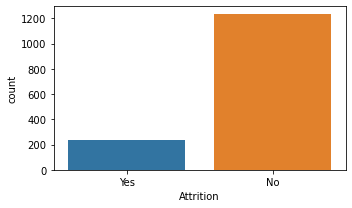

In [9]:
print(df['Attrition'].value_counts())

plt.rcParams["figure.figsize"] = [5.00, 3.0]
plt.rcParams["figure.autolayout"] = True

sns.countplot(x='Attrition', data=df)

<strong>Explanation:</strong><br>
A dataset is called as balanced if the outcome variables are distributed in 1:1 ratio.<br>
In our case, the outcome variable 'Attrition' has 237 Yes and 1233.
The distribution is <strong>IMBALANCED</strong> as the Yes values outnumber the Y values in about 5:1 ratio.

<h5>------------------------------------------------------------------------------------ DATA UNDERSTANDING ------------------------------------------------------------------------------------------</h5>

<h2>4) Understanding Data</h2>

<h5>4 a) How many features?</h5>

In [201]:
len(df.columns)

33

<h5>4 b) Visualization of data</h5>

We can visualize and analyze the distribution of the data in following ways:<br>
1) Categorical Data -- Count Plot / Pie charts<br>
2) Continuous Data -- Histogram distribution

<strong>Note:</strong><br>
We will not be plotting for the "EmployeeNumber" as it is an id, it hardly contributes anything for the decision making 

<h5>4 b i) Count Plots (for categorical attributes)</h5>

Following attributes belong to the Categorical type in the broad aspect:

<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'Attrition'</td>
        <td style="text-align: left; border: 1px solid">'BusinessTravel'</td>
        <td style="text-align: left; border: 1px solid">'Department'</td>
        <td style="text-align: left; border: 1px solid">'Education'</td>
        <td style="text-align: left; border: 1px solid">'EducationField'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'Gender'</td>
        <td style="text-align: left; border: 1px solid">'JobRole'</td>
        <td style="text-align: left; border: 1px solid">'MaritalStatus'</td>
        <td style="text-align: left; border: 1px solid">'Over18'</td>
        <td style="text-align: left; border: 1px solid">'OverTime'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'EnvironmentSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'JobInvolvement'</td>
        <td style="text-align: left; border: 1px solid">'JobLevel'</td>
        <td style="text-align: left; border: 1px solid">'JobSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'NumCompaniesWorked'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'PercentSalaryHike'</td>
        <td style="text-align: left; border: 1px solid">'PerformanceRating'</td>
        <td style="text-align: left; border: 1px solid">'RelationshipSatisfaction'</td>
        <td style="text-align: left; border: 1px solid">'StockOptionLevel'</td>
        <td style="text-align: left; border: 1px solid">'TrainingTimesLastYear'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'WorkLifeBalance'</td>
    </tr>
</table>

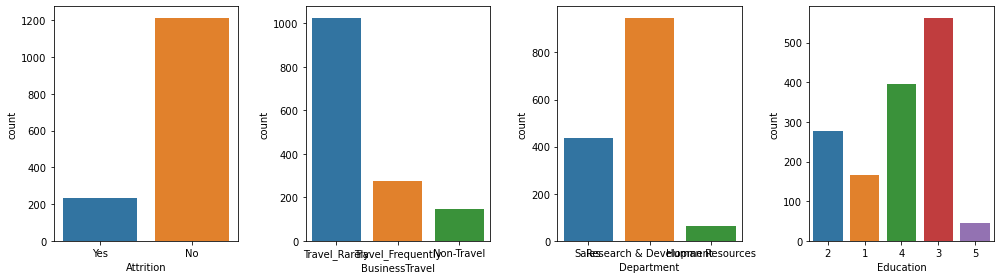

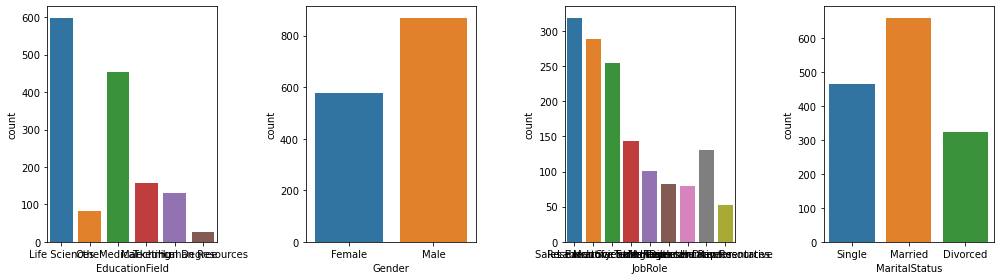

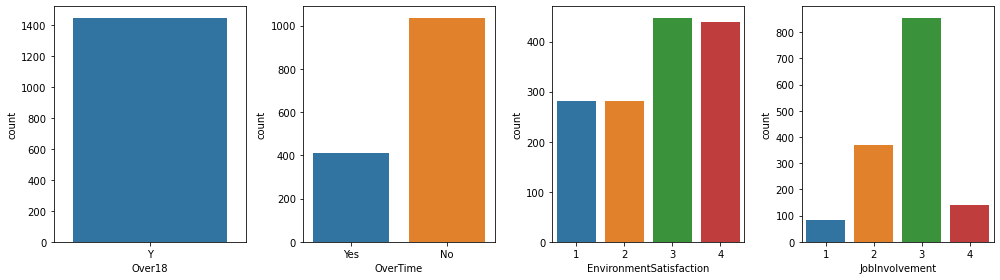

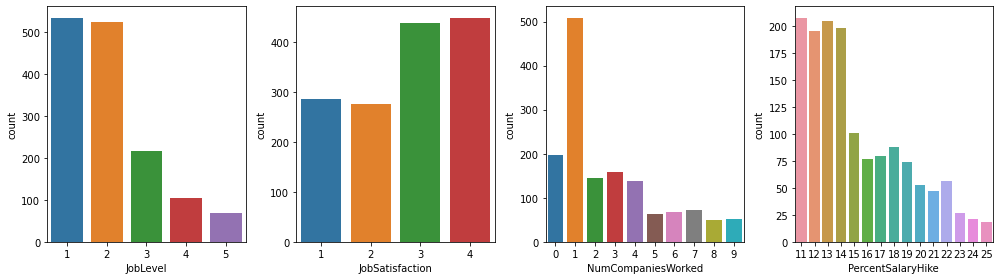

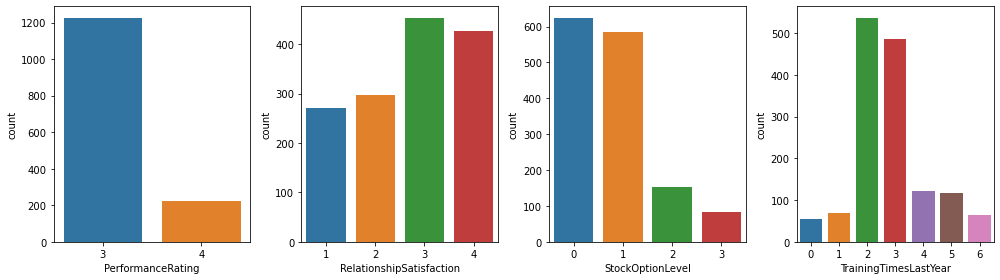

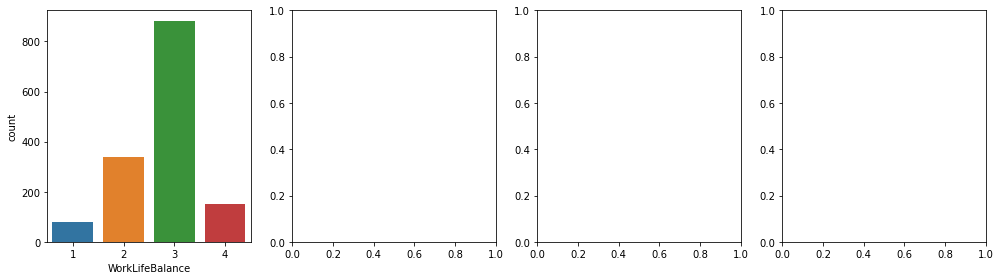

In [11]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

categoricalAttr = ['Attrition','BusinessTravel','Department','Education',
                   'EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',
                   'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked',
                   'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel',
                   'TrainingTimesLastYear','WorkLifeBalance']

index = 0
graphsInARow = 4

for attr in categoricalAttr:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
        
    sns.countplot(x=attr, data=dfAnly, ax = ax[index % graphsInARow])
    index = index + 1
    
    if (index % graphsInARow == 0):
        plt.show()



<h5>4 b ii) Histogram Distribution (for Continuous Attributes)</h5>

Hostogram plot is best suited to understand the spread for continuous data. Following attributes belong to the continuous type in the broad aspect:
<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <tr>
        <td style="text-align: left; border: 1px solid">'DistanceFromHome'</td>
        <td style="text-align: left; border: 1px solid">'HourlyRate'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyIncome'</td>
        <td style="text-align: left; border: 1px solid">'MonthlyRate'</td>
        <td style="text-align: left; border: 1px solid">'Age'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'DailyRate'</td>
        <td style="text-align: left; border: 1px solid">'TotalWorkingYears'</td>
        <td style="text-align: left; border: 1px solid">'YearsAtCompany'</td>
        <td style="text-align: left; border: 1px solid">'YearsInCurrentRole'</td>
        <td style="text-align: left; border: 1px solid">'YearsSinceLastPromotion'</td>
    </tr>
    <tr>
        <td style="text-align: left; border: 1px solid">'YearsWithCurrManager'</td>
    </tr>
</table>

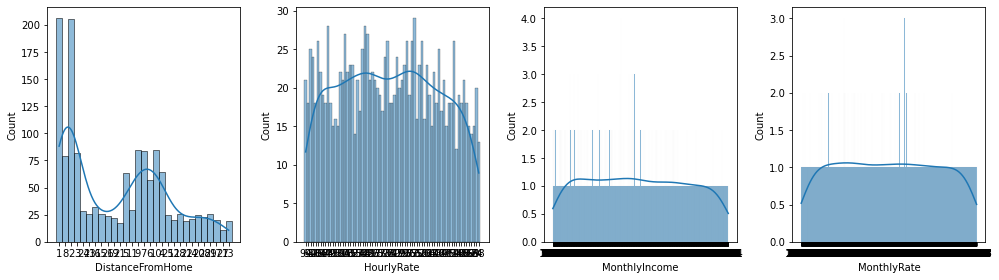

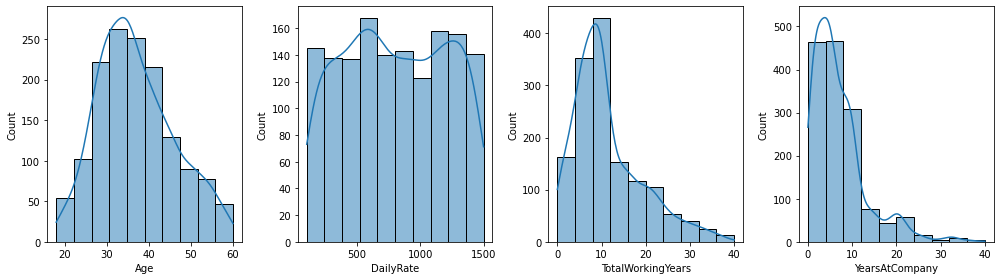

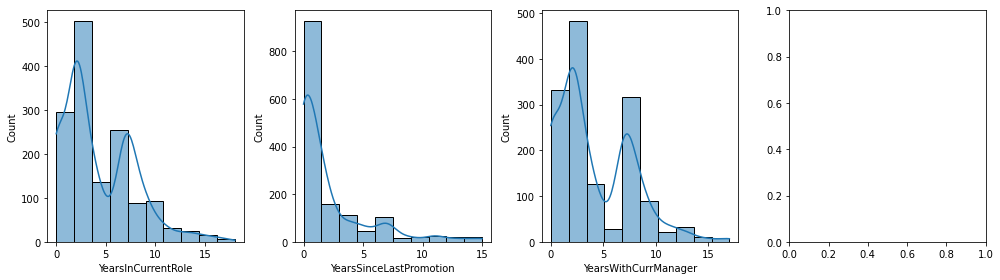

In [12]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

continuosAttr = ['DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','Age','DailyRate','TotalWorkingYears',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

index = 0
graphsInARow = 4

# MonthlyIncome MonthlyRate

for attr in continuosAttr:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=dfAnly[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()


<h5>---------------------------------------------------------------------------------------- WRANGLING ---------------------------------------------------------------------------------------------------</h5>

<h2>5) Data Wrangling</h2>

<h5 style="padding-left: 15px">5 a) Missing Data - NAN Handling</h5>
<div style="padding-left: 30px">Looking at the data set we can find Data set contains NAN. This is a string NAN which needs to be replaced with Python understandable NaN. this step aims to figure the amount of Missing Data we are having in the data set</div>

In [13]:
# Creating a copy of dataset
dfCurated = df.copy()

# Replace the NAN with python NaN
dfCurated.replace("NAN", np.NaN,inplace=True)

totalRows = len(dfCurated.index);

# Printing neatly
ptbl = PrettyTable()
ptbl.field_names = ["Attribute", "NAN Count", "NAN%"]
for column in dfCurated:

        # Lists all coloumns and unique value in them
        if (dfCurated[column].isna().sum()) :
            ptbl.add_row([str(column), str(dfCurated[column].isna().sum()),
                          str(round((dfCurated[column].isna().sum() / totalRows) * 100, 2))])

print(ptbl)

+------------------+-----------+------+
|    Attribute     | NAN Count | NAN% |
+------------------+-----------+------+
| DistanceFromHome |     5     | 0.34 |
|    Education     |     1     | 0.07 |
|    HourlyRate    |     5     | 0.34 |
|  MonthlyIncome   |     5     | 0.34 |
|   MonthlyRate    |     5     | 0.34 |
+------------------+-----------+------+


<strong>Analysis:</strong><br>
<label>From the above analysis we find that the "NAN" count is lesser than 1% for the data set, hence we can:</label>
<ol>
    <li>Drop the NAN records</li>
    <li>Fill the NAN values with the mean, mode or median value, but this needs further analysis on data distribution</li>
    <li>Use most probable value to fill in</li>
</ol>


<h5>5 a i) Filling NAN values </h5>

Off the Attributes 'DistanceFromHome', 'Education', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate'.

1. <b>Education</b> is Categorical Variable. Hence Fill with <b>Mode</b> Value
2. Others are numeric hence need to find their skewness measure.<br>
If <b>skewed</b> Fill with <b>median</b> value<br>
Else fill with <b>mean</b> value


In [14]:
NANattr = ['DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Print table
ptbl = PrettyTable()
ptbl.field_names = ["Attributes", "Type", "Skewness", "Mean / Median"]
ptbl.add_row(['Education', 'Categorical', '---', 'Mode'])

for attr in NANattr:
    if ( skew(dfAnly[attr].value_counts()) < 0.5 ):
        ptbl.add_row([attr, 'Numeric', round( skew(dfAnly[attr].value_counts()), 3), 'Mean'])
    else:
        ptbl.add_row([attr, 'Numeric', round( skew(dfAnly[attr].value_counts()), 3), 'Median'])
        
print(ptbl)

+------------------+-------------+----------+---------------+
|    Attributes    |     Type    | Skewness | Mean / Median |
+------------------+-------------+----------+---------------+
|    Education     | Categorical |   ---    |      Mode     |
| DistanceFromHome |   Numeric   |   2.2    |     Median    |
|    HourlyRate    |   Numeric   |  0.137   |      Mean     |
|  MonthlyIncome   |   Numeric   |  3.871   |     Median    |
|   MonthlyRate    |   Numeric   |  6.165   |     Median    |
+------------------+-------------+----------+---------------+


In [15]:
print('----------------- BEFORE ------------------\n')

ptbl = PrettyTable()
ptbl.field_names = ["Attribute", "NAN Count", "NAN%"]
for column in dfCurated:

        # Lists all coloumns and unique value in them
        if (dfCurated[column].isna().sum()) :
            ptbl.add_row([str(column), str(dfCurated[column].isna().sum()),
                          str(round((dfCurated[column].isna().sum() / totalRows) * 100, 2))])

print(ptbl)

# Replacing with mode
dfCurated['Education'].fillna(dfCurated['Education'].value_counts().idxmax(),inplace=True)

# Replacing with median
dfCurated['DistanceFromHome'].fillna(dfCurated['DistanceFromHome'].median(),inplace=True)
dfCurated['MonthlyIncome'].fillna(dfCurated['MonthlyIncome'].median(),inplace=True)
dfCurated['MonthlyRate'].fillna(dfCurated['MonthlyRate'].median(),inplace=True)

# Replacing with mean
hrMean = round( pd.to_numeric(dfCurated['HourlyRate'], errors='coerce').mean(), 0)
dfCurated['HourlyRate'].fillna(hrMean,inplace=True)

print('\n----------------- AFTER ------------------\n')

ptbl = PrettyTable()
ptbl.field_names = ["Attribute", "NAN Count", "NAN%"]

nanAttr = ['Education', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'HourlyRate']
for column in nanAttr:

        # Lists all coloumns and unique value in them
        ptbl.add_row([str(column), str(dfCurated[column].isna().sum()),
                        str(round((dfCurated[column].isna().sum() / totalRows) * 100, 2))])

print(ptbl)


----------------- BEFORE ------------------

+------------------+-----------+------+
|    Attribute     | NAN Count | NAN% |
+------------------+-----------+------+
| DistanceFromHome |     5     | 0.34 |
|    Education     |     1     | 0.07 |
|    HourlyRate    |     5     | 0.34 |
|  MonthlyIncome   |     5     | 0.34 |
|   MonthlyRate    |     5     | 0.34 |
+------------------+-----------+------+

----------------- AFTER ------------------

+------------------+-----------+------+
|    Attribute     | NAN Count | NAN% |
+------------------+-----------+------+
|    Education     |     0     | 0.0  |
| DistanceFromHome |     0     | 0.0  |
|  MonthlyIncome   |     0     | 0.0  |
|   MonthlyRate    |     0     | 0.0  |
|    HourlyRate    |     0     | 0.0  |
+------------------+-----------+------+


<b>Last Step:</b><br>
As a last step we will need to correct the datatype of these attributes back to `int`.

In [16]:
dfCurated["DistanceFromHome"] = dfCurated["DistanceFromHome"].astype(np.int64)
dfCurated["Education"] = dfCurated["Education"].astype(np.int64)
dfCurated["HourlyRate"] = dfCurated["HourlyRate"].astype(np.int64)
dfCurated["MonthlyIncome"] = dfCurated["MonthlyIncome"].astype(np.int64)
dfCurated["MonthlyRate"] = dfCurated["MonthlyRate"].astype(np.int64)

<h5>5 a ii) Checking if duplicates exist </h5>

In [17]:
dfCurated[dfCurated.duplicated()]

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


<h5>5 a iii) Label Encoding </h5>

As part of label encoding we will convert the categorial string attributes to numeric type so that is helpful in feature engineering and model building. For this:<br>
<u><b>Step 1:</b></u> Convert prediction variable manually (Yes : 1, No : 0)<br>
<u><b>Step 2:</b></u> Convert remaining categorical attributes by Label Encoder<br>

In [18]:
dfCurated.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


In [19]:
# Replace the Yes: 1, No: 0
dfCurated['Attrition'].replace("Yes", 1,inplace=True)
dfCurated['Attrition'].replace("No", 0,inplace=True)

In [20]:
dfCurated.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


In [21]:
dfCurated.info()
dfCurated.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7


In [22]:
# Transform categorical / non-numeric columns into numerical columns
for column in dfCurated.columns:
        if dfCurated[column].dtype == 'object':
            dfCurated[column] = LabelEncoder().fit_transform(dfCurated[column])

dfCurated.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7


<h5>------------------------------------------------------------------------------- FEATURE SELECTION ---------------------------------------------------------------------------------------------</h5>

<h2>6) Feature Selection</h2>

<h5>6 a) Manual Attribute Selection</h5>

Off the 33 attributes we have, we caneliminate 2 attributes, the <b>'EmployeeNumber'</b> and the <b>'Over18'</b> fields as:
<ol>
    <li><b>'EmployeeNumber'</b> has all <b>unique values</b> hence will not contribute much in model building and predictoins</li>
    <li><b>'Over18'</b> attribute has all values as <b>'Y'</b></li>
</ol>

In [23]:
droppableAttributes = ['EmployeeNumber', 'Over18']

# Print values in tabular form
ptbl = PrettyTable()
ptbl.field_names = ["Attribute", "Unique count", "Per Value Freq"]

for attr in droppableAttributes:
    ptbl.add_row( [attr, len(dfCurated[attr].unique()), dfCurated[attr].value_counts()] )

print(ptbl)

+----------------+--------------+--------------------------------------------------+
|   Attribute    | Unique count |                  Per Value Freq                  |
+----------------+--------------+--------------------------------------------------+
| EmployeeNumber |     1470     |                    2046    1                     |
|                |              |                    641     1                     |
|                |              |                    644     1                     |
|                |              |                    645     1                     |
|                |              |                    647     1                     |
|                |              |                           ..                     |
|                |              |                    1364    1                     |
|                |              |                    1367    1                     |
|                |              |                    1368    1   

<b>Dropping Columns<b>

In [24]:
print('--------------- Before --------------')
print('Columns Count: ', len(dfCurated.columns))

# Dropping the columns from the curated data frame
dfCurated = dfCurated.drop(columns=['EmployeeNumber', 'Over18'])

print('\n--------------- After --------------')
print('Columns Count: ', len(dfCurated.columns))

--------------- Before --------------
Columns Count:  33

--------------- After --------------
Columns Count:  31


<h5>6 b) Corelation Analysis</h5>

<h5>6 b i) Constructing Corelation Matrix</h5>

In [25]:
print('Columns Count: ', len(dfCurated.columns))

# Constructing the Correlation Matrix
dfCurated.corr()

Columns Count:  31


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.056652,0.063991,0.080685,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.024751,0.010661,-0.031882,-0.000752,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.000074,0.024751,1.000000,-0.004086,-0.009044,-0.024387,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.056652,0.010661,-0.004086,1.000000,0.007109,-0.008186,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,-0.031882,-0.009044,0.007109,1.000000,0.017237,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.080685,-0.000752,-0.024387,-0.008186,0.017237,1.000000,0.016487,0.003600,-0.019123,0.000413,...,0.029111,0.005578,0.043831,0.004527,-0.034925,-0.023630,0.009257,0.018516,0.004206,0.011553
Education,-0.031373,0.208034,0.000757,-0.016806,0.007996,0.016487,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.026846,-0.040873,0.023724,0.037709,0.013720,0.003600,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,0.018355,-0.019395,-0.019123,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.032981,-0.011716,-0.041583,0.000413,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<h5>6 b ii) Constructing Correlation Heat Mapp</h5>

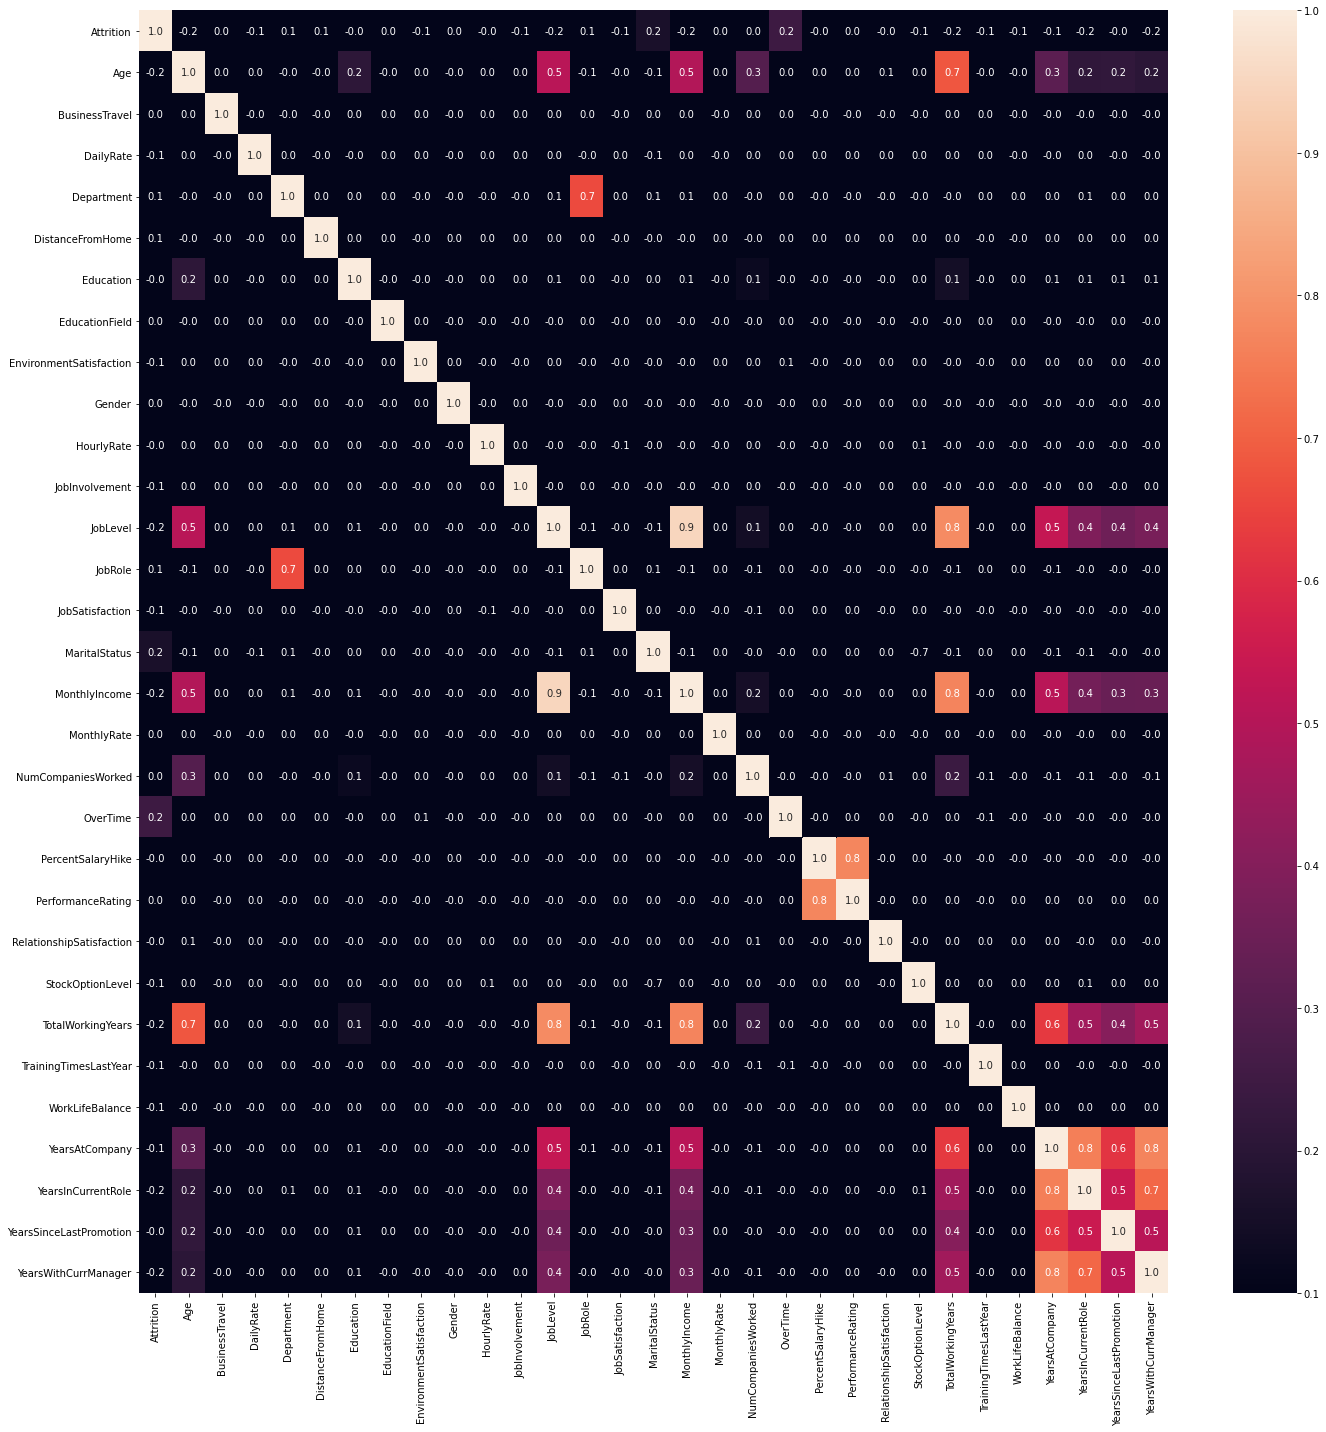

In [26]:
# Picturing correlation
plt.figure(figsize=(20,20)) 
corelationMtrx = dfCurated.corr()
sns.heatmap(dfCurated.corr(), annot=True, fmt='.1f', vmin=0.1)

<b>Analysis:</b><br>
In the heat map. if we take the attrition column we find the values range from -0.2 to 0.2 which is not much of a credible score to select the features and the count too is less. Hence, going for Chi Square and Info Gain Analysis.

<h5>6 c) Chi Square Analysis</h5>

<h5>6 c i) Splitting VERTICALLY into Pedictor and non-predictor attributes for training the model</h5>

In [27]:
X = dfCurated.iloc[:, 1:dfCurated.shape[1]]
Y = dfCurated.iloc[:, 0]
X.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7


<h5>6 c ii) Chi Square Analysis</h5>

In [43]:
# Ordering attributes based on their Ki square importance
orderedChiIndexList = []
cols = []

for i in range(1, 21):

    # Select top k features
    chi2_selector = SelectKBest(chi2, k=i)
    X_kbest = chi2_selector.fit(X, Y)
    cols = chi2_selector.get_support(indices=True)

    for j in cols:
        if (j not in orderedChiIndexList):
            orderedChiIndexList.append(j)

FS_chisquareAttrs = X.iloc[:, orderedChiIndexList]
print('Order fo Indices:')
print(orderedChiIndexList)
FS_chisquareAttrs.head(2)

Order fo Indices:
[15, 16, 2, 23, 26, 27, 29, 0, 4, 18, 22, 11, 14, 12, 28, 13, 7, 17, 10, 24]


,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,DistanceFromHome,OverTime,StockOptionLevel,JobLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,NumCompaniesWorked,JobInvolvement,TrainingTimesLastYear
0,5993,19479,1102,8,6,4,5,41,1,1,0,2,2,7,0,4,2,8,3,0
1,5130,24907,279,10,10,7,7,49,8,0,1,2,1,6,1,2,3,1,2,3


<h5>6 d) Info Gain Analysis</h5>

In [44]:
# Determining the mutual information values
info_gain = mutual_info_classif(X, Y)

# Combining result along with column names
xfeature_list = X.columns.values.tolist()

FS_infoGain = pd.DataFrame(list(zip(xfeature_list, info_gain)), columns =['Feature', 'InfoGain'])
FS_infoGain = FS_infoGain.sort_values(by=['InfoGain'], ascending=False)
FS_infoGainAttrs = X.iloc[:, X.columns.get_indexer(xfeature_list)]

FS_infoGainAttrs.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7


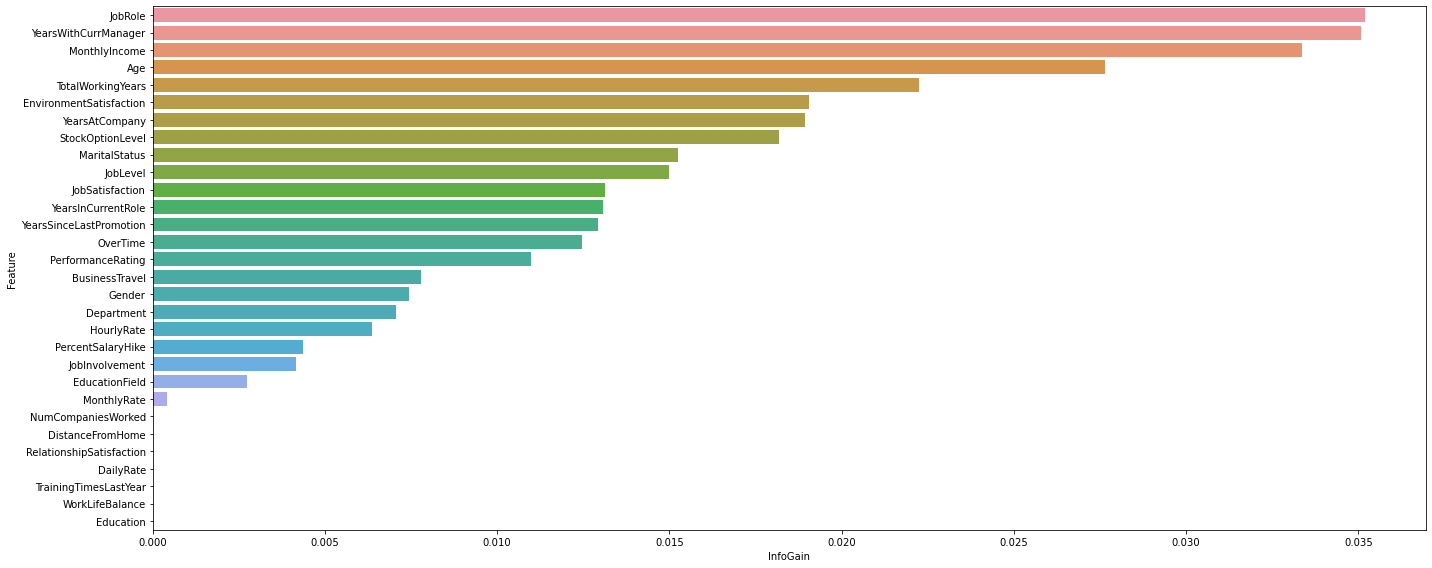

In [45]:
plt.subplots(figsize=(20,8))
sns.barplot(x = "InfoGain", y = "Feature", data = FS_infoGain)

<h5>Getting the best common attributes from the 'InfoGain' and the 'ChiSquare', feature selection measures</h5>

In [46]:
commonAttrList = list( set(xfeature_list[:20]).intersection( set(FS_chisquareAttrs.iloc[:, :20].columns) ) )
FS_common = X.iloc[:, X.columns.get_indexer(commonAttrList)]
FS_common.head(2)

,DistanceFromHome,MonthlyRate,DailyRate,JobSatisfaction,OverTime,Age,JobLevel,MaritalStatus,EnvironmentSatisfaction,JobInvolvement,JobRole,MonthlyIncome,NumCompaniesWorked
0,1,19479,1102,4,1,41,2,2,2,3,7,5993,8
1,8,24907,279,2,0,49,2,1,3,2,6,5130,1


<h5> Analysis of Feature Selection</h5>

We have now extracted the attributes having the:
1. Higher <b>chiSquare</b> values into <b>'FS_chisquareAttrs'</b>
2. Higher <b>infogain</b> values into <b>'FS_infoGainAttrs'</b>.
3. The <b>Intersection</b> of the InfoGain and the ChiSquare Attributes as <b>'FS_common'</b>
Putting these values in the model we get the following results off this we see that for <b>Chi Square</b> gives a better metric in the model>hence selecting the chisquare Approach


<table style="border: 1px solid; width: 100%; font-size: 1.3rem">
    <thead>
        <tr>
            <td style="text-align: left; border: 1px solid">&nbsp;</td>
            <td style="text-align: left; border: 1px solid">Sensitivity</td>
            <td style="text-align: left; border: 1px solid">Specificity</td>
            <td style="text-align: left; border: 1px solid">Accuracy</td>
            <td style="text-align: left; border: 1px solid">Precision</td>
            <td style="text-align: left; border: 1px solid">F1score</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left; border: 1px solid">Tree_Chi</td>
            <td style="text-align: left; border: 1px solid">0.371</td>
            <td style="text-align: left; border: 1px solid">0.895</td>
            <td style="text-align: left; border: 1px solid">0.812</td>
            <td style="text-align: left; border: 1px solid">0.4</td>
            <td style="text-align: left; border: 1px solid">0.385</td>
        </tr>
        <tr>
            <td style="text-align: left; border: 1px solid">Tree_Info</td>
            <td style="text-align: left; border: 1px solid">0.347</td>
            <td style="text-align: left; border: 1px solid">0.845</td>
            <td style="text-align: left; border: 1px solid">0.762</td>
            <td style="text-align: left; border: 1px solid">0.309</td>
            <td style="text-align: left; border: 1px solid">0.327</td>
        </tr>
        <tr>
            <td style="text-align: left; border: 1px solid">Tree_FSComon</td>
            <td style="text-align: left; border: 1px solid">0.408</td>
            <td style="text-align: left; border: 1px solid">0.857</td>
            <td style="text-align: left; border: 1px solid">0.782</td>
            <td style="text-align: left; border: 1px solid">0.364</td>
            <td style="text-align: left; border: 1px solid">0.385</td>
        </tr>
    </tbody>
</table>


<h5>Final Feature selected dataframe</h5>

In [48]:
FS_df = pd.concat( [ dfCurated.iloc[:, :1], FS_chisquareAttrs.iloc[:, :FS_chisquareAttrs.shape[1] - 1] ], axis=1, join='inner')
print('Columns Count: ',len(FS_df.columns))
FS_df.head(2)

Columns Count:  20


,Attrition,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,DistanceFromHome,OverTime,StockOptionLevel,JobLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,NumCompaniesWorked,JobInvolvement
0,1,5993,19479,1102,8,6,4,5,41,1,1,0,2,2,7,0,4,2,8,3
1,0,5130,24907,279,10,10,7,7,49,8,0,1,2,1,6,1,2,3,1,2


<h5>------------------------------------------------------------------------------- FEATURE ENGINEERING ---------------------------------------------------------------------------------------------</h5>

<h2>7) Feature Engineering</h2>

<h5>7 a) Feature ranking technique - (Used Info Gain anf Chi Square Analysis)</h5>

In Sections (5 c) and (5 d) we ranked the attributes based on their best Chi Square and Info Gain values and found that ChiSquare has better metrics when put into the model. Hence going for the CHi Sqare Feature Ranking and the features selected during the process

<h5>7 b) Feature Engineering - 1 (Normalizing Data)</h5>

In [52]:
# Using Min Max Scaler
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(FS_df)

# Creating new Data frame with the scaled value
FE1_Norm = pd.DataFrame(min_max_scaled, columns = FS_df.columns)

FE1_Norm.head(2)


,Attrition,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,DistanceFromHome,OverTime,StockOptionLevel,JobLevel,MaritalStatus,JobRole,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,NumCompaniesWorked,JobInvolvement
0,1.0,0.262454,0.698053,0.71582,0.20,0.15,0.222222,0.294118,0.547619,0.00,1.0,0.000000,0.25,1.0,0.875,0.000000,1.000000,0.333333,0.888889,0.666667
1,0.0,0.217009,0.916001,0.12670,0.25,0.25,0.388889,0.411765,0.738095,0.25,0.0,0.333333,0.25,0.5,0.750,0.066667,0.333333,0.666667,0.111111,0.333333


<h5>7 c) Feature Engineering - 2 (Outlier Curation)</h5>

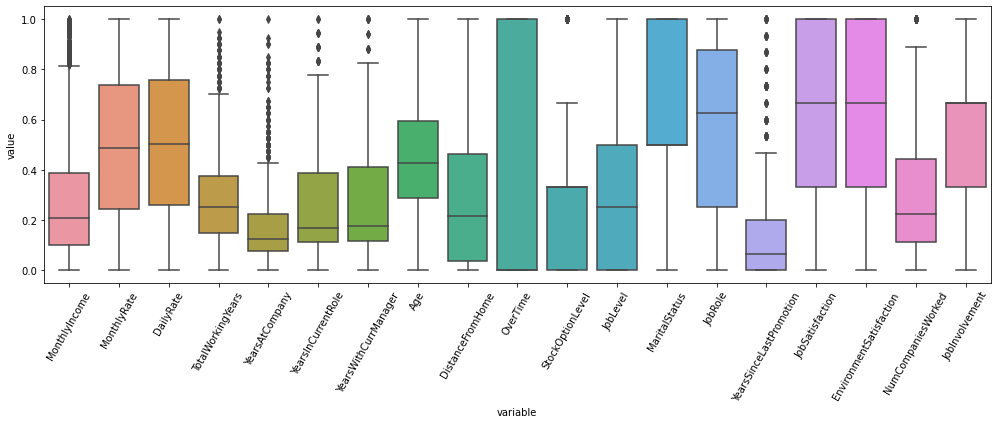

In [54]:
# Plotting Box plot before Outlier Treatment
plt.rcParams["figure.figsize"] = [14.00, 6.0]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(FE1_Norm.iloc[:, 1:20]) )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
print() # To remove junk logs spilled out of above code

From the plot we can see there are outliers at the upper end of the data. Trying to cap the outlier at 95 Percentile

In [55]:
FE2_Outlr = FS_df.copy()
numericalAttr = ['DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'Age', 'DailyRate',
                   'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for attr in list(FE2_Outlr.columns.values)[1:19]:
    if (attr in numericalAttr):
        upper_quantile = FE2_Outlr[attr].quantile(.95)
        FE2_Outlr.loc[(FE2_Outlr[attr] > upper_quantile),attr] = upper_quantile

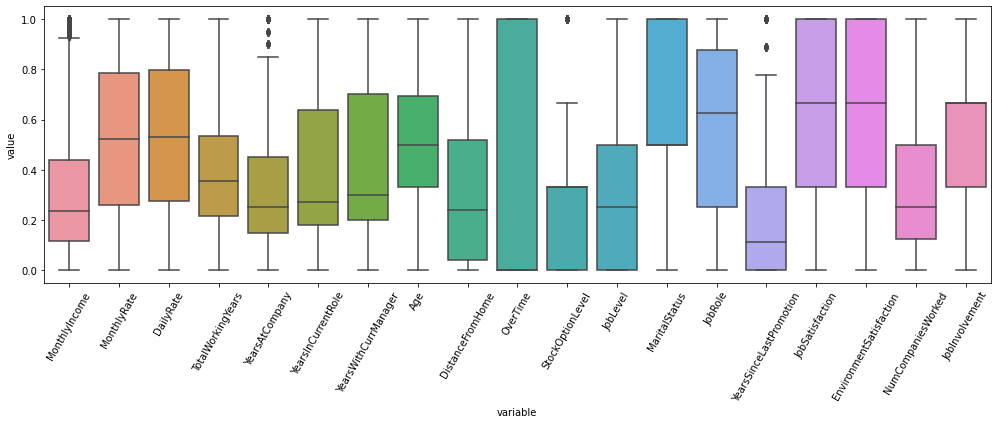

In [62]:
# Using Min Max Scaler
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(FE2_Outlr)

# Creating new Data frame with the scaled value
FE3_Outlr_Norm = pd.DataFrame(min_max_scaled, columns = FE2_Outlr.columns)

# Plotting Box plot before Outlier Treatment
plt.rcParams["figure.figsize"] = [14.00, 6.0]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(FE3_Outlr_Norm.iloc[:, 1:20]))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
print() # To remove junk logs spilled out of above code

<b>Analysis:</b><br>
Comparing the box blots we can see that outliers has been reduce much. And we can also see that now the attributes  'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrentManager', 'NumCompaniesWorked' have come clean out of the  outliers as per the above box plot.

<h5>------------------------------------------------------------------------------------ MODELLING --------------------------------------------------------------------------------------------------</h5>

<h2>8) Building the Model (Modelling)</h2>

<h5>8 a) Splitting VERTICALLY to Pedictor & non-predictor attributes for training the model</h5>

In [75]:
# Splitting Feature Engineering 1 - Normalization
X_norm = FE1_Norm.iloc[:, 1:FE1_Norm.shape[1]]
Y_norm = FE1_Norm.iloc[:, 0]

# Splitting Feature Engineering 2 - Outlier Handling
X_outlr = FE2_Outlr.iloc[:, 1:FE2_Outlr.shape[1]]
Y_outlr = FE2_Outlr.iloc[:, 0]

# Splitting Feature Engineering 3 - Normalization + utlier Handling
X_nom_outlr = FE3_Outlr_Norm.iloc[:, 1:FE3_Outlr_Norm.shape[1]]
Y_nom_outlr = FE3_Outlr_Norm.iloc[:, 0]

<h5>8 b) Splitting the dataset HORIZONTALLY into traiing and testing dataset 80-20</h5>

The split percentages most commonly used are:
1. Train: 80%, Test: 20%<br>
2. Train: 67%, Test: 33%<br>
3. Train: 50%, Test: 50%<br>     
Rereference: [https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/]

We will go for the 80-20 split, as more the data we train better the accuracy, and get the training and testing data for <b>FE1_Norm, FE2_Outlr, FE3_Outlr_Norm</b> dataset separately.

In [78]:
# Splitting dataset to 80% Training dataset & 20% Testing dataset
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, Y_norm, train_size = 0.80, random_state = 0)
x_train_outlr, x_test_outlr, y_train_outlr, y_test_outlr = train_test_split(X_outlr, Y_outlr, train_size = 0.80, random_state = 0)
x_train_nom_outlr, x_test_nom_outlr, y_train_nom_outlr, y_test_nom_outlr = train_test_split(X_nom_outlr, Y_nom_outlr, train_size = 0.80, random_state = 0)

# Print splitting into a table
ptbl = PrettyTable()
ptbl.field_names = ["FE Technique", "X Train (80%)", "Y Train (20%)", "X Test (80%)", "Y Test (20%)"]
ptbl.add_row(['Normalized', x_train_norm.shape, y_train_norm.shape, x_test_norm.shape, y_test_norm.shape])
ptbl.add_row(['Outlier Curated', x_train_outlr.shape, y_train_outlr.shape, x_test_outlr.shape, y_test_outlr.shape])
ptbl.add_row(['Combined', x_train_nom_outlr.shape, y_train_nom_outlr.shape, x_test_nom_outlr.shape, y_test_nom_outlr.shape])
print(ptbl)

+-----------------+---------------+---------------+--------------+--------------+
|   FE Technique  | X Train (80%) | Y Train (20%) | X Test (80%) | Y Test (20%) |
+-----------------+---------------+---------------+--------------+--------------+
|    Normalized   |   (1176, 19)  |    (1176,)    |  (294, 19)   |    (294,)    |
| Outlier Curated |   (1176, 19)  |    (1176,)    |  (294, 19)   |    (294,)    |
|     Combined    |   (1176, 19)  |    (1176,)    |  (294, 19)   |    (294,)    |
+-----------------+---------------+---------------+--------------+--------------+


<h5>8 c) Building Models</h5>

<h5>8 c i) The Decision Tree  Classifier</h5>

In [136]:
# Creating the decisionTreeClassifier

# For: Normalized Data set
dTreeClf_norm = tree.DecisionTreeClassifier()
dTreeClf_norm = dTreeClf_norm.fit(x_train_norm, y_train_norm)
y_pred_tree_norm = dTreeClf_norm.predict(x_test_norm)

# For: Outlier Curated Dataset
dTreeClf_outlr = tree.DecisionTreeClassifier()
dTreeClf_outlr = dTreeClf_outlr.fit(x_train_outlr, y_train_outlr)
y_pred_tree_outlr = dTreeClf_outlr.predict(x_test_outlr)

# For: Both Normalised + Outlier Curated Dataset
dTreeClf_norm_outlr = tree.DecisionTreeClassifier()
dTreeClf_norm_outlr = dTreeClf_norm_outlr.fit(x_train_nom_outlr, y_train_nom_outlr)
y_pred_tree_norm_outlr = dTreeClf_norm_outlr.predict(x_test_nom_outlr)

<h6>8 c ii) Building Model using - The Logic Regression Classifier</h6>

In [155]:
# Creating the decisionTreeClassifier

# # For: Normalized Data set
lRegClf_norm = LogisticRegression()
lRegClf_norm = lRegClf_norm.fit(x_train_norm, y_train_norm)
y_pred_lReg_norm = lRegClf_norm.predict(x_test_norm)

# For: Outlier Curated Dataset
# Throws error saying max iterations reached

# For: Both Normalised + Outlier Curated Dataset
lRegClf_norm_outlr = LogisticRegression()
lRegClf_norm_outlr = lRegClf_norm_outlr.fit(x_train_nom_outlr, y_train_nom_outlr)
y_pred_lReg_norm_outlr = lRegClf_norm_outlr.predict(x_test_nom_outlr)

<b>Obrservation:</b><br>
Logistic Regression throws error for non normalised data saying the Stopping due to maximum iterations reached. Hence it feels it cannot be applied to non normalised data. The outlier FE2 analysis hence cannot be done using the Logistic regression method.

<h5>------------------------------------------------------------------------------------ EVALUATIONS --------------------------------------------------------------------------------------------------</h5>

<h2>9. Evaluating Model</h2>

<h3>9 a) Evaluating - Decision Tree Technique</h3>

<h4>9 a i) Classification Report</h4>

In [162]:
# Comparing the classification Report of decision tree for FE1 and FE2
ptbl = PrettyTable()
ptbl.field_names = ["FE1 - Normalization", "FE2 - Normalization + Outlier Handling"]
ptbl.add_row([ classification_report(y_test_norm, y_pred_tree_norm),
               classification_report(y_test_nom_outlr, y_pred_tree_norm_outlr) ])
print(ptbl)

+-------------------------------------------------------+-------------------------------------------------------+
|                  FE1 - Normalization                  |         FE2 - Normalization + Outlier Handling        |
+-------------------------------------------------------+-------------------------------------------------------+
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |
|          0.0       0.87      0.84      0.85       245 |          0.0       0.89      0.84      0.87       245 |
|          1.0       0.32      0.39      0.35        49 |          1.0       0.38      0.47      0.42        49 |
|                                                       |                                                       |
|     accuracy                           0.76       294 |     accuracy                  

<h4>9 a ii) Plotting Confusion Matrix</h4>

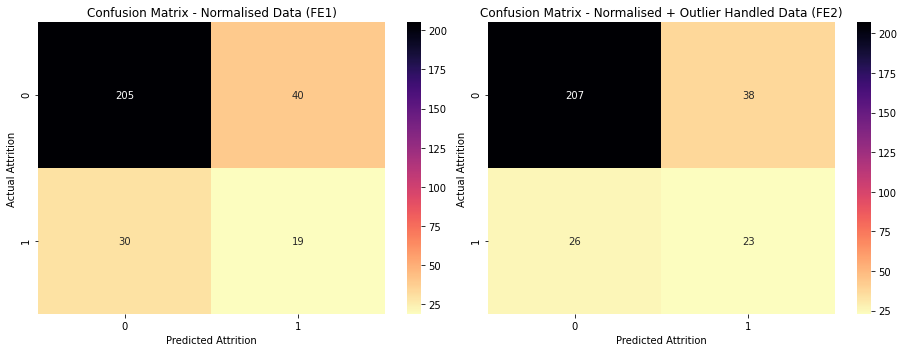

In [196]:
# Setting Graph Size
plt.rcParams["figure.figsize"] = [13.00, 5.0]
plt.rcParams["figure.autolayout"] = True

# Confusion Matrix
cm_tree_norm = confusion_matrix(y_test_norm, y_pred_tree_norm)
cm_tree_norm_outlr = confusion_matrix(y_test_nom_outlr, y_pred_tree_norm_outlr)
class_names = [0, 1] # name  of classes [0 = No, 1 = Yes]

fig, ax = plt.subplots(1, 2)

# Creating heatmap of Confusion Matrix
sns.heatmap(pd.DataFrame(cm_tree_norm), annot=True, cmap='magma_r' ,fmt='g', ax = ax[0]).set(title='Confusion Matrix - Normalised Data (FE1)', xlabel='Predicted Attrition', ylabel='Actual Attrition')
sns.heatmap(pd.DataFrame(cm_tree_norm_outlr), annot=True, cmap='magma_r' ,fmt='g', ax = ax[1]).set(title='Confusion Matrix - Normalised + Outlier Handled Data (FE2)', xlabel='Predicted Attrition', ylabel='Actual Attrition')
print()

<h4>9 a iii) F1 Score</h4>

In [163]:
# F1 Score comparison for decision tree for FE 1 and FE 2
f1_norm = f1_score(y_test_norm, y_pred_tree_norm)
f1_norm_outlr = f1_score(y_test_nom_outlr, y_pred_tree_norm_outlr)

#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["F1Score - Normalised (FE1)", "F1Score - Normalised + Outlier Handled (FE2)"]
ptbl.add_row([round(f1_norm, 3), round(f1_outlr, 3)])
print(ptbl)

+----------------------------+----------------------------------------------+
| F1Score - Normalised (FE1) | F1Score - Normalised + Outlier Handled (FE2) |
+----------------------------+----------------------------------------------+
|           0.352            |                    0.432                     |
+----------------------------+----------------------------------------------+


<h3>9 b) Evaluating - Logistic Regression Technique</h3>

<h4>9 b i) Classification Report</h4>

In [156]:
# Comparing the classification Report of decision tree for FE1 and FE2
ptbl = PrettyTable()
ptbl.field_names = ["FE1 - Normalization", "FE2 - Normalization + Outlier Handling"]
ptbl.add_row([ classification_report(y_test_norm, y_pred_lReg_norm),
               classification_report(y_test_nom_outlr, y_pred_lReg_norm_outlr) ])
print(ptbl)

+-------------------------------------------------------+-------------------------------------------------------+
|                  FE1 - Normalization                  |         FE2 - Normalization + Outlier Handling        |
+-------------------------------------------------------+-------------------------------------------------------+
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |
|          0.0       0.88      0.98      0.93       245 |          0.0       0.88      0.98      0.93       245 |
|          1.0       0.81      0.35      0.49        49 |          1.0       0.81      0.35      0.49        49 |
|                                                       |                                                       |
|     accuracy                           0.88       294 |     accuracy                  

<h4>9 b ii) Plotting Confusion Matrix</h4>

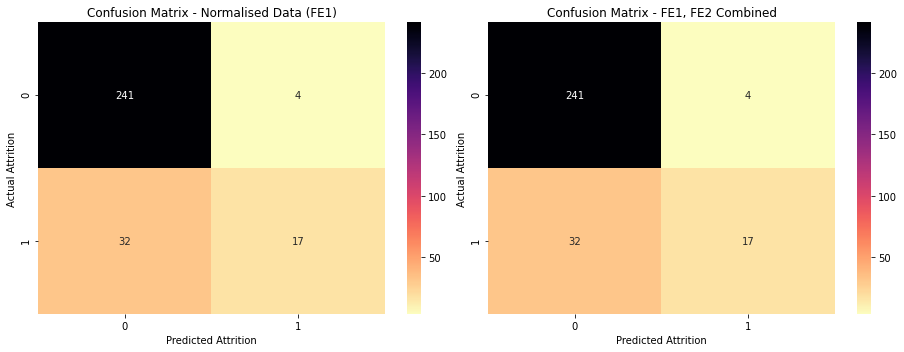

In [157]:
# Setting Graph Size
plt.rcParams["figure.figsize"] = [13.00, 5.0]
plt.rcParams["figure.autolayout"] = True

# Confusion Matrix
cm_tree_norm = confusion_matrix(y_test_norm, y_pred_lReg_norm)
cm_tree_norm_outlr = confusion_matrix(y_test_nom_outlr, y_pred_lReg_norm_outlr)
class_names = [0, 1] # name  of classes [0 = No, 1 = Yes]

# Creating heatmap of Confusion Matrix
fig, ax = plt.subplots(1, 2)
sns.heatmap(pd.DataFrame(cm_tree_norm), annot=True, cmap='magma_r' ,fmt='g', ax = ax[0]).set(title='Confusion Matrix - Normalised Data (FE1)', xlabel='Predicted Attrition', ylabel='Actual Attrition')
sns.heatmap(pd.DataFrame(cm_tree_norm_outlr), annot=True, cmap='magma_r' ,fmt='g', ax = ax[1]).set(title='Confusion Matrix - FE1, FE2 Combined', xlabel='Predicted Attrition', ylabel='Actual Attrition')
print()

<h4>9 b iii) F1 Score</h4>

In [158]:
# F1 Score comparison for decision tree for FE 1 and FE 2
f1_norm = f1_score(y_test_norm, y_pred_lReg_norm)
f1_norm_outlr = f1_score(y_test_nom_outlr, y_pred_lReg_norm_outlr)

#Print some metrics in a table
ptbl = PrettyTable()
ptbl.field_names = ["F1Score - Normalised (FE1)", "F1Score - Combined (FE1 + FE2)"]
ptbl.add_row([round(f1_norm, 3), round(f1_norm_outlr, 3)])
print(ptbl)

+----------------------------+--------------------------------+
| F1Score - Normalised (FE1) | F1Score - Combined (FE1 + FE2) |
+----------------------------+--------------------------------+
|           0.486            |             0.486              |
+----------------------------+--------------------------------+


<h5>------------------------------------------------------------------------------------ COMPARISON --------------------------------------------------------------------------------------------------</h5>

<h2>10) Comparison of Models</h5>

<h5>10 a) Comparing the Classification Reports for FE1, FE2 for both Clasifiers 

In [167]:
# Comparing the classification Report of decision tree for FE1 and FE2
ptbl = PrettyTable()
ptbl.field_names = ["", "Decision Tree", "Logistic Regression"]
ptbl.add_row(["FE1", classification_report(y_test_norm, y_pred_tree_norm), classification_report(y_test_norm, y_pred_lReg_norm) ])
ptbl.add_row(["FE2", classification_report(y_test_nom_outlr, y_pred_tree_norm_outlr), classification_report(y_test_nom_outlr, y_pred_lReg_norm_outlr) ])
print(ptbl)

+-----+-------------------------------------------------------+-------------------------------------------------------+
|     |                     Decision Tree                     |                  Logistic Regression                  |
+-----+-------------------------------------------------------+-------------------------------------------------------+
| FE1 |               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|     |                                                       |                                                       |
|     |          0.0       0.87      0.84      0.85       245 |          0.0       0.88      0.98      0.93       245 |
|     |          1.0       0.32      0.39      0.35        49 |          1.0       0.81      0.35      0.49        49 |
|     |                                                       |                                                       |
|     |     accuracy                    

<h5>10 b) Comparison using ROC Curves</h5>

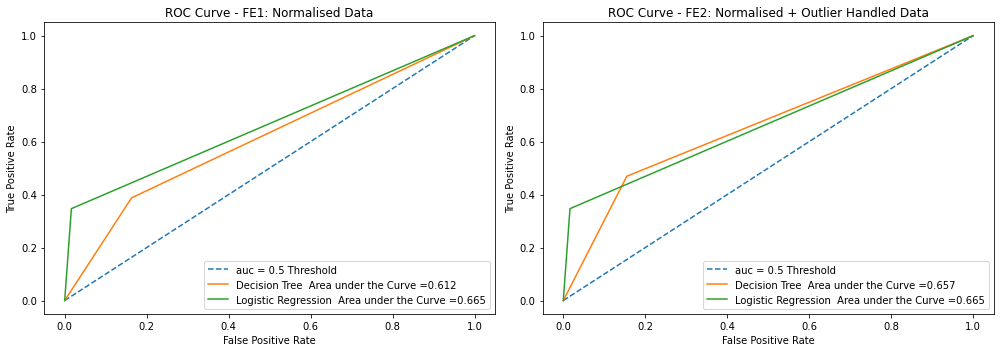

In [198]:
#Plotting ROC Curves for FE1 - Normalization
FE1_tr_fpr, FE1_tr_tpr, FE1_tr_thresholds = roc_curve(y_test_norm, y_pred_tree_norm)
FE1_lreg_fpr, FE1_lreg_tpr, FE1_lreg_thresholds = roc_curve(y_test_norm, y_pred_lReg_norm)
FE2_tr_fpr, FE2_tr_tpr, FE2_tr_thresholds = roc_curve(y_test_nom_outlr, y_pred_tree_norm_outlr)
FE2_lreg_fpr, FE2_lreg_tpr, FE2_lreg_thresholds = roc_curve(y_test_nom_outlr, y_pred_lReg_norm_outlr)

FE1_tr_auc = roc_auc_score(y_test_norm, y_pred_tree_norm)
FE1_lreg_auc = roc_auc_score(y_test_norm, y_pred_lReg_norm)
FE2_tr_auc = roc_auc_score(y_test_nom_outlr, y_pred_tree_norm_outlr)
FE2_lreg_auc = roc_auc_score(y_test_nom_outlr, y_pred_lReg_norm_outlr)

x = np.linspace(0, 1)
y = np.linspace(0, 1)

plt.rcParams["figure.figsize"] = [14.00, 5.0]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot(x, y, linestyle="--", label="auc = 0.5 Threshold")
ax1.plot(FE1_tr_fpr, FE1_tr_tpr, label="Decision Tree  Area under the Curve =" + str(np.round(FE1_tr_auc,3)))
ax1.plot(FE1_lreg_fpr, FE1_lreg_tpr, label="Logistic Regression  Area under the Curve =" + str(np.round(FE1_lreg_auc,3)))
ax1.set(title = "ROC Curve - FE1: Normalised Data", xlabel = "False Positive Rate", ylabel = "True Positive Rate")
ax1.legend(loc=4)

ax2.plot(x, y, linestyle="--", label="auc = 0.5 Threshold")
ax2.plot(FE2_tr_fpr, FE2_tr_tpr, label="Decision Tree  Area under the Curve =" + str(np.round(FE2_tr_auc,3)))
ax2.plot(FE2_lreg_fpr, FE2_lreg_tpr, label="Logistic Regression  Area under the Curve =" + str(np.round(FE2_lreg_auc,3)))
ax2.set(title = "ROC Curve - FE2: Normalised + Outlier Handled Data", xlabel = "False Positive Rate", ylabel = "True Positive Rate")
ax2.legend(loc=4)

plt.show()

<h5>------------------------------------------------------------------------------------ CONCLUSION --------------------------------------------------------------------------------------------------</h5>

<h2>11) Conclusion</h2>

For the given dataset, we have equal number of categorical and numeric attributes. We selected the attributes using the KBest chisquare method as it gave better results in the model than the Info Gain and the Correlation Analysis. Further building the models and evaluvating them against the Feature Engineering techniques of normalization and outlier handling, we found Logistic Regression Classifier giving better results than the Decision tree classifier. Going by the AUC (Area Under the Curve) metric, the Logistic Regression Model when supplied with outlier smoothened, normalized data gives the best results. Hence, we conclude for the given data set having more categorial attributes, logistic regression clasifier proved better than the decision tree classifier. The model will predict `No` values better and can be used to figure  out if an employee will not leave a company.

<h5>------------------------------------------------------------------ RECOMMENDATIONS / SUGGESTIONS -------------------------------------------------------------------------------</h5>

<h2>12) Recommendations</h2>

Eventhough the Logistic Regression Model on normalised, outlier smoothened data, has better Precision and the F1 Score, we find the Sensitivity or the recall rate of `Yes` values to be 0.35. This could be due to lesser number of `Yes` values of outcome variables in the given data set. This can be improved by periodically training the Logistic Regression model with more `Yes` records (may be additional patterns to improve the accuracy).